In [1]:
import cv2
print(cv2.__version__)

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt

# 1. Cargar imagen original
imagen = cv2.imread('imagen_1920x1080.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)




4.12.0
1.26.4


In [2]:
# 2. Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)



In [3]:
# 3. Redimensionar a 640x360
gris_redimensionada = cv2.resize(gris, (640, 360), interpolation=cv2.INTER_AREA)



In [4]:
# 4. Aplicar Descomposición en Valores Singulares (Singular Value Decomposition o SVD)
U, S, VT = np.linalg.svd(gris_redimensionada, full_matrices=False)

# Selección de componentes (por ejemplo, k=50)
k = 50
U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]



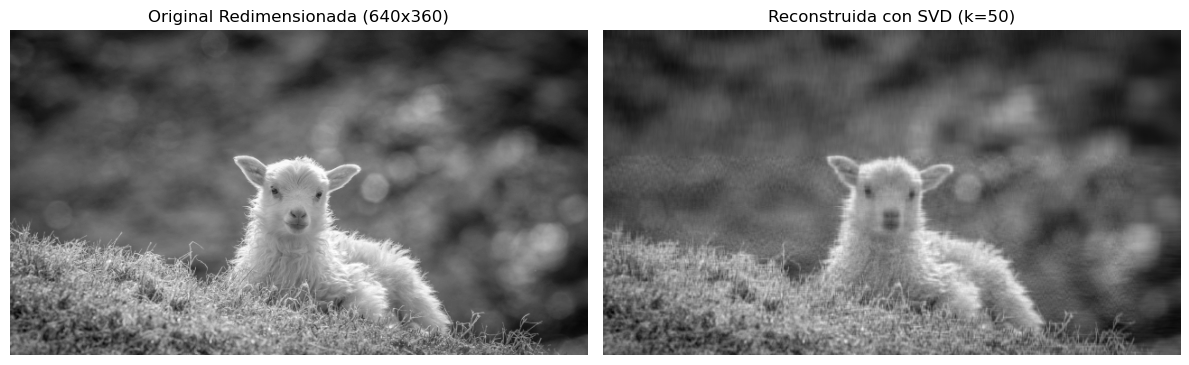

In [5]:
# 5. Reconstrucción de imagen comprimida
imagen_comprimida = np.dot(U_k, np.dot(S_k, VT_k))

# Visualización comparativa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Redimensionada (640x360)')
plt.imshow(gris_redimensionada, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Reconstruida con SVD (k={k})')
plt.imshow(imagen_comprimida, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()